In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [3]:
plt.style.use('seaborn-deep')

In [4]:
G = 6.67e-11 # universal gravitational constant in si units
mbh = 4e6 # mass of black hole, in solar masses
rho0 = 3.5e5 # density of stellar cluster at 1pc, in solar masses per cubic parsec

sm2kg = 1.989e30 # solar masses to kg
pc2m = 3.086e16 # parsecs to meters 

In [5]:
# velocity curve due to point mass black hole
def v1(r):
    # takes in radius in parsecs, outputs velocity in km/s
    return np.sqrt(G * mbh * sm2kg / (r * pc2m)) / 1000

In [6]:
# mass enclosed for stellar cluster
def menc(a, r):
    # takes in density profile power a, and radius r in parsecs, outputs mass in solar masses
    return 4 * np.pi * rho0 / (3-a) * np.power(r, 3-a)


# velocity curve due to stellar cluster
def v2(a, r):
    # takes in radius in parsecs, outputs velocity in km/s
    return np.sqrt(G * (menc(a, r) * sm2kg) / (r * pc2m)) / 1000

In [7]:
# velocity curve of black hole + stellar cluster, calculated from masses
def v3a(a, r):
    # takes in density profile power a, and radius in parsecs, outputs velocity in km/s
    return np.sqrt(G * ((mbh + menc(a, r)) * sm2kg) / (r * pc2m)) / 1000

# same thing, but calculated from velocities
def v3b(v1, v2):
    return np.sqrt(np.square(v1) + np.square(v2))

In [25]:
a = 1
x = np.logspace(-3, np.log10(50), 10000)
y1 = v1(x)
y2 = v2(a, x)
# y3a = v3a(a, x)
y3b = v3b(y1, y2)

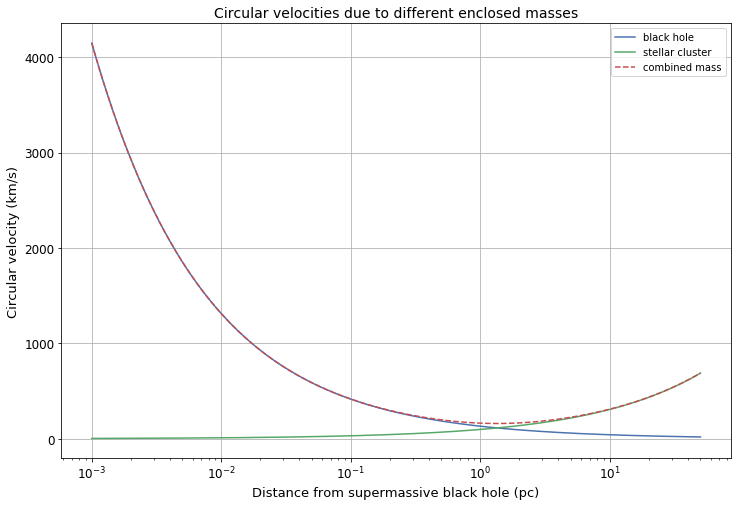

In [26]:
plt.figure(figsize=(12, 8))
plt.xscale('log')
plt.plot(x, y1, label='black hole')
plt.plot(x, y2, label='stellar cluster')
# plt.plot(x, y3a, label='total mass')
plt.plot(x, y3b, label='combined mass', ls='--')
plt.legend()
plt.xlabel('Distance from supermassive black hole (pc)', fontsize=13)
plt.ylabel('Circular velocity (km/s)', fontsize=13)
plt.title('Circular velocities due to different enclosed masses', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=None)
plt.savefig('velocity_curves.png')

In [53]:
x[np.argmin(np.abs(y1 - y2))]

1.3484256513399333